In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from pandas import json_normalize
import datetime

In [ ]:
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
youtubeUS = pd.read_csv('/content/combined_dataset (1).csv', encoding='latin-1')

In [ ]:
CategoryCSV = pd.read_csv('/content/test.csv')
print(CategoryCSV)

    id                  title
0    1       Film & Animation
1    2       Autos & Vehicles
2   10                  Music
3   15         Pets & Animals
4   17                 Sports
5   18           Short Movies
6   19        Travel & Events
7   20                 Gaming
8   21          Videoblogging
9   22         People & Blogs
10  23                 Comedy
11  24          Entertainment
12  25        News & Politics
13  26          Howto & Style
14  27              Education
15  28   Science & Technology
16  29  Nonprofits & Activism
17  30                 Movies
18  31        Anime/Animation
19  32       Action/Adventure
20  33               Classics
21  34                 Comedy
22  35            Documentary
23  36                  Drama
24  37                 Family
25  38                Foreign
26  39                 Horror
27  40         Sci-Fi/Fantasy
28  41               Thriller
29  42                 Shorts
30  43                  Shows
31  44               Trailers


In [ ]:
Trend_Video_US = youtubeUS

In [ ]:
Trend_Video_US.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [ ]:
Trend_Video_US.shape

(381568, 16)

In [ ]:
Trend_Video_US = Trend_Video_US.drop(['comments_disabled','ratings_disabled',
                      'description','tags', 'thumbnail_link', 'video_error_or_removed'], axis= 1)

In [ ]:
Trend_Video_US.isnull()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
381563,False,False,False,False,False,False,False,False,False,False
381564,False,False,False,False,False,False,False,False,False,False
381565,False,False,False,False,False,False,False,False,False,False
381566,False,False,False,False,False,False,False,False,False,False


In [ ]:
Trend_Video_US.dtypes

,0
video_id,object
trending_date,object
title,object
channel_title,object
category_id,float64
publish_time,object
views,object
likes,object
dislikes,object
comment_count,float64


In [ ]:
CategoryCSV.dtypes

,0
id,int64
title,object


In [ ]:
CategoryCSV = CategoryCSV.rename(columns={'id':'category_id'})
CategoryCSV = CategoryCSV.rename(columns={'title':'category'})

In [ ]:
Trend_Video_US_CAT = pd.merge(Trend_Video_US,CategoryCSV,how="left",on="category_id")

In [ ]:
Trend_Video_US_CAT.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,17158579.0,787425.0,43420.0,125882.0,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,1014651.0,127794.0,1688.0,13030.0,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,3191434.0,146035.0,5339.0,8181.0,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,2095828.0,132239.0,1989.0,17518.0,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,33523622.0,1634130.0,21082.0,85067.0,Music


In [ ]:
# The original format string '%y.%d.%m' was incorrect.
# Looking at the data in the CSV file, the correct format is '%y.%d.%m'.
Trend_Video_US_CAT['trending_date'] = pd.to_datetime(Trend_Video_US_CAT['trending_date'], format='%y.%d.%m', errors='coerce').dt.date

In [ ]:
# Convert 'publish_time' to datetime, handling errors
Trend_Video_US_CAT['publish_date'] = pd.to_datetime(Trend_Video_US_CAT['publish_time'], errors='coerce').dt.date

# Filter out rows where 'publish_date' is NaT (Not a Time)
Trend_Video_US_CAT = Trend_Video_US_CAT[Trend_Video_US_CAT['publish_date'].notna()]

In [ ]:
Trend_Video_US_CAT['publish_time'] = pd.to_datetime(Trend_Video_US_CAT['publish_time']).dt.time

In [ ]:
Trend_Video_US_CAT.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,category,publish_date
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,17:00:03,17158579.0,787425.0,43420.0,125882.0,Music,2017-11-10
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,17:00:00,1014651.0,127794.0,1688.0,13030.0,Comedy,2017-11-13
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,19:05:24,3191434.0,146035.0,5339.0,8181.0,Comedy,2017-11-12
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,18:01:41,2095828.0,132239.0,1989.0,17518.0,Entertainment,2017-11-12
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,11:04:14,33523622.0,1634130.0,21082.0,85067.0,Music,2017-11-09


In [ ]:
#making y changing unsupervised to supervised

date_diff = Trend_Video_US_CAT

date_diff['date_diff'] = date_diff['trending_date']-date_diff['publish_date']

# Convert 'date_diff' to timedelta type before using .dt.days
Trend_Video_US_CAT['Days_to_Trend'] = pd.to_timedelta(date_diff['date_diff']).dt.days

In [ ]:
Trend_Video_US_CAT.drop(['date_diff'], axis= 1)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,category,publish_date,Days_to_Trend
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,17:00:03,17158579.0,787425.0,43420.0,125882.0,Music,2017-11-10,4
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,17:00:00,1014651.0,127794.0,1688.0,13030.0,Comedy,2017-11-13,1
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,19:05:24,3191434.0,146035.0,5339.0,8181.0,Comedy,2017-11-12,2
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,18:01:41,2095828.0,132239.0,1989.0,17518.0,Entertainment,2017-11-12,2
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,11:04:14,33523622.0,1634130.0,21082.0,85067.0,Music,2017-11-09,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381563,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15.0,13:00:04,1685609.0,38160.0,1385.0,2657.0,Pets & Animals,2018-05-18,27
381564,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22.0,01:00:06,1064798.0,60008.0,382.0,3936.0,People & Blogs,2018-05-18,27
381565,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24.0,17:34:22,1066451.0,48068.0,1032.0,3992.0,Entertainment,2018-05-18,27
381566,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1.0,17:00:04,5660813.0,192957.0,2846.0,13088.0,Film & Animation,2018-05-17,28


In [ ]:
#output variable is ready when video takes more than 1 day its tier 2
Trend_Video_US_CAT['class'] = np.where((Trend_Video_US_CAT['Days_to_Trend']>1), 'class2', 'class1')

In [ ]:
Trend_Video_US_CAT['class']= Trend_Video_US_CAT['class'].map({'class1' : 0 , 'class2' : 1} )

In [ ]:
Trend_Video_US_CAT.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,category,publish_date,date_diff,Days_to_Trend,class
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10.0,17:00:03,17158579.0,787425.0,43420.0,125882.0,Music,2017-11-10,"4 days, 0:00:00",4,1
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,17:00:00,1014651.0,127794.0,1688.0,13030.0,Comedy,2017-11-13,"1 day, 0:00:00",1,0
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,19:05:24,3191434.0,146035.0,5339.0,8181.0,Comedy,2017-11-12,"2 days, 0:00:00",2,1
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24.0,18:01:41,2095828.0,132239.0,1989.0,17518.0,Entertainment,2017-11-12,"2 days, 0:00:00",2,1
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,11:04:14,33523622.0,1634130.0,21082.0,85067.0,Music,2017-11-09,"5 days, 0:00:00",5,1


In [ ]:
# correlation map denotes vairiables sucah as view, likes, dislikes , comment count have positive correaltion with
#each other

## Modelling

In [ ]:
df1 = Trend_Video_US_CAT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distances
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Rename the target column
df1 = df1.rename(columns={'class': 'tier'})

# Convert 'views', 'likes', 'dislikes', 'comment_count' to numeric
for col in ['views', 'likes', 'dislikes', 'comment_count']:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Now create the new features
df1['like_ratio'] = df1['likes'] / (df1['views'] + 1)
df1['dislike_ratio'] = df1['dislikes'] / (df1['views'] + 1)
df1['engagement'] = (df1['likes'] + df1['dislikes'] + df1['comment_count']) / (df1['views'] + 1)
# Define features and target
feature_columns = ['views', 'likes', 'dislikes', 'comment_count', 'like_ratio', 'dislike_ratio', 'engagement']
X = df1[feature_columns]
Y = df1['tier']

# Clean the data
df_cleaned = pd.concat([X, Y], axis=1).dropna()
X = df_cleaned[feature_columns]
Y = df_cleaned['tier']

# Feature selection: Select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, Y)

# Optionally, get the selected feature names
selected_features = [feature_columns[i] for i in selector.get_support(indices=True)]
print("Selected features:", selected_features)

# Split into train and test sets using selected features
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=42)


Selected features: ['views', 'likes', 'comment_count', 'like_ratio', 'engagement']


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
target_names = ['0', '1']

### K Nearest Neighbors Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_pred1 = knn.predict(X_test)
print(classification_report(Y_test, y_pred1, target_names=target_names))
print(y_pred1)

              precision    recall  f1-score   support

           0       0.69      0.74      0.71     58172
           1       0.70      0.65      0.68     54611

    accuracy                           0.70    112783
   macro avg       0.70      0.70      0.70    112783
weighted avg       0.70      0.70      0.70    112783

[0 0 0 ... 0 0 0]


### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
random_forest = RandomForestClassifier()
random_forest = random_forest.fit(X_train, Y_train)
y_pred2 = random_forest.predict(X_test)
accuracy_score(Y_test,y_pred2)

0.78154509101549

### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred3 =DT_model.predict(X_test)

XGBoost Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import warnings

# Optional: Silence future warnings
warnings.filterwarnings('ignore')

# Define the model with a fixed random seed
xgb_model = xgb.XGBClassifier(random_state=42)

# Stratified k-fold for better distribution of classes
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fit the model (no grid search in this case)
xgb_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, y_pred_xgb)
precision = precision_score(Y_test, y_pred_xgb, average='weighted')
recall = recall_score(Y_test, y_pred_xgb, average='weighted')
f1 = f1_score(Y_test, y_pred_xgb, average='weighted')

# Print results
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_xgb))


Accuracy Score: 0.7264
Precision Score: 0.7269
Recall Score: 0.7264
F1 Score: 0.7257

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74     58172
           1       0.73      0.68      0.71     54611

    accuracy                           0.73    112783
   macro avg       0.73      0.72      0.73    112783
weighted avg       0.73      0.73      0.73    112783

Confusion Matrix:
 [[44737 13435]
 [17426 37185]]


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import warnings

# Optional: Silence future warnings
warnings.filterwarnings('ignore')

# Define the model with a fixed random seed
lgb_model = lgb.LGBMClassifier(random_state=42)

# Stratified k-fold for better distribution of classes
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fit the model (no grid search in this case)
lgb_model.fit(X_train, Y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(Y_test, y_pred_lgb)
precision = precision_score(Y_test, y_pred_lgb, average='weighted')
recall = recall_score(Y_test, y_pred_lgb, average='weighted')
f1 = f1_score(Y_test, y_pred_lgb, average='weighted')

# Print results
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, y_pred_lgb))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 127172, number of negative: 135986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 263158, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483253 -> initscore=-0.067011
[LightGBM] [Info] Start training from score -0.067011
Accuracy Score: 0.7209
Precision Score: 0.7215
Recall Score: 0.7209
F1 Score: 0.7202

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74     58172
           1       0.73      0.67      0.70     54611

    accuracy                           0.72    112783
   macro avg       0.72      0.72      0.72    112783
weighted avg       0.72      0.72      0.72    112783

Confusion Matrix:
 [[44525 13647]
 [17826 36785]]




```
# This is formatted as code
```

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Calculate scores for all models
log_reg_accuracy = accuracy_score(Y_test, y_pred)
log_reg_precision = precision_score(Y_test, y_pred)
log_reg_f1 = f1_score(Y_test, y_pred)

knn_accuracy = accuracy_score(Y_test, y_pred1)
knn_precision = precision_score(Y_test, y_pred1)
knn_f1 = f1_score(Y_test, y_pred1)

rf_accuracy = accuracy_score(Y_test, y_pred2)
rf_precision = precision_score(Y_test, y_pred2)
rf_f1 = f1_score(Y_test, y_pred2)

dt_accuracy = accuracy_score(Y_test, y_pred3)
dt_precision = precision_score(Y_test, y_pred3)
dt_f1 = f1_score(Y_test, y_pred3)

xgb_accuracy = accuracy_score(Y_test, y_pred_xgb)
xgb_precision = precision_score(Y_test, y_pred_xgb)
xgb_f1 = f1_score(Y_test, y_pred_xgb)

lgb_accuracy = accuracy_score(Y_test, y_pred_lgb)
lgb_precision = precision_score(Y_test, y_pred_lgb)
lgb_f1 = f1_score(Y_test, y_pred_lgb)

# Print scores for each model
print('Logistic Regression')
print('---------------------------------------------')
print('Accuracy Score:', log_reg_accuracy)
print('Precision Score:', log_reg_precision)
print('F1 Score:', log_reg_f1)
print('---------------------------------------------')

print('Knn Model')
print('---------------------------------------------')
print('Accuracy Score:', knn_accuracy)
print('Precision Score:', knn_precision)
print('F1 Score:', knn_f1)
print('---------------------------------------------')

print('Random Forest Model')
print('---------------------------------------------')
print('Accuracy Score:', rf_accuracy)
print('Precision Score:', rf_precision)
print('F1 Score:', rf_f1)
print('---------------------------------------------')

print('Decision Tree Model')
print('---------------------------------------------')
print('Accuracy Score:', dt_accuracy)
print('Precision Score:', dt_precision)
print('F1 Score:', dt_f1)
print('---------------------------------------------')

print('XGBoost Model')
print('---------------------------------------------')
print('Accuracy Score:', xgb_accuracy)
print('Precision Score:', xgb_precision)
print('F1 Score:', xgb_f1)
print('---------------------------------------------')

print('LightGBM Model')
print('---------------------------------------------')
print('Accuracy Score:', lgb_accuracy)
print('Precision Score:', lgb_precision)
print('F1 Score:', lgb_f1)
print('---------------------------------------------')

# Compare models based on F1 Score (or any other metric you prefer)
model_scores = {
    'Logistic Regression': log_reg_f1,
    'Knn Model': knn_f1,
    'Random Forest': rf_f1,
    'Decision Tree': dt_f1,
    'XGBoost': xgb_f1,
    'LightGBM': lgb_f1
}

# Find the best model based on F1 Score (or Accuracy, Precision)
best_model = max(model_scores, key=model_scores.get)

print('---------------------------------------------')
print(f'Best Model based on F1 Score: {best_model}')
print(f'F1 Score: {model_scores[best_model]}')
print('---------------------------------------------')


Logistic Regression
---------------------------------------------
Accuracy Score: 0.682549675039678
Precision Score: 0.7895676807488607
F1 Score: 0.5888823819858303
---------------------------------------------
Knn Model
---------------------------------------------
Accuracy Score: 0.6962751478502965
Precision Score: 0.6989211585818708
F1 Score: 0.676158333096987
---------------------------------------------
Random Forest Model
---------------------------------------------
Accuracy Score: 0.78154509101549
Precision Score: 0.8040906600653369
F1 Score: 0.762854447802568
---------------------------------------------
Decision Tree Model
---------------------------------------------
Accuracy Score: 0.7288598458987613
Precision Score: 0.725596590375697
F1 Score: 0.7165158706615248
---------------------------------------------
XGBoost Model
---------------------------------------------
Accuracy Score: 0.726368335653423
Precision Score: 0.7345910707230344
F1 Score: 0.7067309062918722
---------

### visualization the model

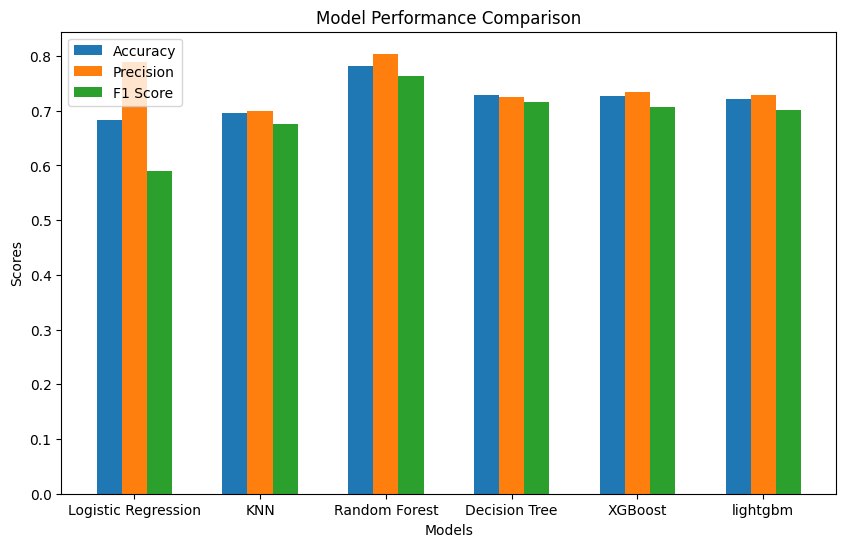

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Model names
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree','XGBoost', 'lightgbm']

# Scores
accuracy = [
    accuracy_score(Y_test, y_pred),
    accuracy_score(Y_test, y_pred1),
    accuracy_score(Y_test, y_pred2),
    accuracy_score(Y_test, y_pred3),
    accuracy_score(Y_test, y_pred_xgb),
    accuracy_score(Y_test, y_pred_lgb)


]
precision = [
    precision_score(Y_test, y_pred),
    precision_score(Y_test, y_pred1),
    precision_score(Y_test, y_pred2),
    precision_score(Y_test, y_pred3),
    precision_score(Y_test, y_pred_xgb),
    precision_score(Y_test, y_pred_lgb)

]
f1 = [
    f1_score(Y_test, y_pred),
    f1_score(Y_test, y_pred1),
    f1_score(Y_test, y_pred2),
    f1_score(Y_test, y_pred3),
    f1_score(Y_test, y_pred_xgb),
    f1_score(Y_test, y_pred_lgb)
]

# Visualization
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x, precision, width, label='Precision')
ax.bar(x + width, f1, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()
